In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# Replace 'your_file.xlsx' with your actual filename
file_path = 'C:/Users/INTERN SBT/Documents/AssetWise Project/dataset/raw/New_QN_data (1).xlsx'
table_path = 'C:/Users/INTERN SBT/Documents/AssetWise Project/dataset/raw/ProjectID_Detail.xlsx'

# file_path = 'D:/AssetWise Project/New_QN_data (1).xlsx'
# table_path = 'D:/AssetWise Project/ProjectID_Detail.xlsx'

# For reading the first sheet
df = pd.read_excel(file_path, engine='openpyxl')
# For reading a specific sheet by name
table = pd.read_excel(table_path, engine='openpyxl')

In [4]:
df.rename(columns={'Occcupation': 'Occupation'}, inplace=True)
table.rename(columns={'Project ID': 'projectid'}, inplace=True)

In [5]:
merged_df = pd.merge(df, table, on='projectid', how='left')
merged_df

,customerid,projectid,questiondate,questiontime,fillindate,saledate,bookingdate,gender,purchasing_reason,decide_purchase_reason,...,purchase_intent,travel_route_today,marital_status,occupation,age,Type,Project Brand,Project Type,Starting Price,Location
0,144275,30,2564-09-23 13:35:41,2025-02-23 13:35:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
1,144280,30,2564-09-23 14:00:44,2025-02-23 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
2,148576,30,2564-11-03 11:49:59,2025-02-23 11:49:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
3,148579,30,2564-11-03 11:52:25,2025-02-23 11:52:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
4,148585,30,2564-11-03 12:12:23,2025-02-23 12:12:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68864,1981-08-25 00:00:00,28,2562-02-28 03:28:00,2025-02-23 03:28:00,2562-02-28 03:28:00,2562-02-28 03:28:00,2562-02-28 03:28:00,NaN,NaN,NaN,...,NaN,NaN,สมรส มีบุตร (คน),NaN,NaN,คอนโดมิเนียม,ATMOZ,LOW RISE,1490000,แจ้งวัฒนะ
68865,1981-08-27 00:00:00,28,2562-02-28 03:36:00,2025-02-23 03:36:00,2562-02-28 03:36:00,2562-02-28 03:36:00,2562-02-28 03:36:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25-35 ปี,คอนโดมิเนียม,ATMOZ,LOW RISE,1490000,แจ้งวัฒนะ
68866,1989-02-28 00:00:00,28,2562-03-11 03:30:00,2025-02-23 03:30:00,2562-03-11 03:30:00,2562-03-11 03:30:00,2562-03-11 03:30:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36-45 ปี,คอนโดมิเนียม,ATMOZ,LOW RISE,1490000,แจ้งวัฒนะ
68867,2295-04-18 00:00:00,18,2564-09-24 14:06:31,2025-02-23 14:06:00,2564-09-24 14:06:31,2564-09-24 14:08:07,2564-09-24 14:13:02,ชาย,NaN,NaN,...,NaN,NaN,โสด,อื่นๆ,NaN,คอนโดมิเนียม,KAVE,Campus Condo,2590000,พหลโยธิน


# Preprocessing Data

In [6]:
df = merged_df.copy()

In [7]:
def fix_year(dt_str):
    if pd.isna(dt_str):
        return pd.NaT
    try:
        # Extract and adjust year
        parts = str(dt_str).split('-')
        fixed_year = int(parts[0]) - 543 #2559 if you want to convert from Buddhist Era to Gregorian
        return pd.to_datetime(f"{fixed_year}-{'-'.join(parts[1:])}")
    except:
        return pd.NaT

df['questiondate'] = df['questiondate'].apply(fix_year)
df['bookingdate'] = df['bookingdate'].apply(fix_year)

# Create binary target - 1 if booked, 0 otherwise
df['has_booked'] = df['bookingdate'].notnull().astype(int)
# df['Missing_DecisionTime'] = df['Decision Time'].isnull().astype(int)
# print(df.groupby('Missing_DecisionTime')['has_booked'].mean())



In [8]:
condo_df = df[df['Type'] == 'คอนโดมิเนียม'].copy()
house_df = df[df['Type'] != 'คอนโดมิเนียม'].copy()

In [9]:
# Exclude the first 3 columns
cols_to_check = condo_df.columns[7:]

for col in cols_to_check:
    # Convert all values to string to avoid TypeError with mixed types
    unique_vals, counts = np.unique(condo_df[col].astype(str), return_counts=True)
    print(f"{col}:")
    for val, count in zip(unique_vals, counts):
        print(f"  Value: {val}  Count: {count}")
    print(f"Total unique: {len(unique_vals)}")
    print("-" * 40)

gender:
  Value: LGBT  Count: 1653
  Value: nan  Count: 13111
  Value: ชาย  Count: 19626
  Value: หญิง  Count: 28211
Total unique: 4
----------------------------------------
purchasing_reason:
  Value: nan  Count: 22300
  Value: ซื้อเก็บเป็นทรัพย์สิน  Count: 3092
  Value: ซื้อเพื่อใช้พื้นที่ส่วนกลาง  Count: 377
  Value: ต้องการพื้นที่ใช้สอยมากขึ้น  Count: 519
  Value: ทำเลที่เดินทางสะดวกขึ้น  Count: 7472
  Value: ราคา  Count: 821
  Value: ลงทุน/ปล่อยเช่า  Count: 10406
  Value: สภาพแวดล้อมที่ดีขึ้น  Count: 3392
  Value: อื่นๆ  Count: 1201
  Value: แต่งงาน/สร้างครอบครัวใหม่  Count: 1375
  Value: โปรโมชั่น  Count: 407
  Value: ใกล้ที่ทำงาน  Count: 6156
  Value: ใกล้มหาวิทยาลัย  Count: 4350
  Value: ใกล้โรงเรียนบุตรหลาน  Count: 733
Total unique: 14
----------------------------------------
decide_purchase_reason:
  Value: nan  Count: 51426
  Value: การดีไซน์รูปแบบอาคาร/แบบบ้าน  Count: 753
  Value: การออกแบบพื้นที่ใช้สอย  Count: 333
  Value: ความน่าเชื่อถือของบริษัท  Count: 19
  Value: ความพ

## Encoding and Translation

In [10]:
condo_df.drop(columns=['home_purchase_budget','land_house_size_wanted','functions_wanted', 'moving_in_count',
                       'preferred_discount_categories_AssetWise_Clubs', 'decision_influencer',
                       'current_residence_type', 'desired_living_area', 'monthly_family_income_baht',
                       'individual_monthly_income_fill', 'preferred_house_style', 'preferred_house_features',
                       'Type'
                       ], inplace=True)

### Binning

In [11]:
import pandas as pd
import numpy as np
import re

def create_bin_assignment_functions():
    """Returns functions for processing different income/budget columns"""
    
    # Standardized bin ranges
    budget_bins = [
        (0, 1.01, "≤ 1.0M"),
        (1.01, 1.51, "1.01 - 1.5M"),
        (1.51, 2.01, "1.51 - 2.0M"),
        (2.01, 2.51, "2.01 - 2.5M"),
        (2.51, 3.01, "2.51 - 3.0M"),
        (3.01, 3.51, "3.01 - 3.5M"),
        (3.51, 4.01, "3.51 - 4.0M"),
        (4.01, 4.51, "4.01 - 4.5M"),
        (4.51, 5.01, "4.51 - 5.0M"),
        (5.01, 6.01, "5.01 - 6.0M"),
        (6.01, 7.01, "6.01 - 7.0M"),
        (7.01, 8.01, "7.01 - 8.0M"),
        (8.01, 9.01, "8.01 - 9.0M"),
        (9.01, 10.01, "9.01 - 10.0M"),
        (10.01, 11.01, "10.01 - 11.0M"),
        (11.01, 12.01, "11.01 - 12.0M"),
        (12.01, 13.01, "12.01 - 13.0M"),
        (13.01, 14.01, "13.01 - 14.0M"),
        (14.01, 15.01, "14.01 - 15.0M"),
        (15.01, 16.01, "15.01 - 16.0M"),
        (16.01, 17.01, "16.01 - 17.0M"),
        (17.01, 20.01, "17.01 - 20.0M"),
        (20.01, 25.01, "20.01 - 25.0M"),
        (25.01, float("inf"), "≥ 25.01M")
    ]

    income_bins = [
        (0, 20001, '≤ 20,000'),
        (20001, 35001, '20,001 - 35,000'),
        (35001, 50001, '35,001 - 50,000'),
        (50001, 65001, '50,001 - 65,000'),
        (65001, 80001, '65,001 - 80,000'),
        (80001, 100001, '80,001 - 100,000'),
        (100001, 120001, '100,001 - 120,000'),
        (120001, 140001, '120,001 - 140,000'),
        (140001, 160001, '140,001 - 160,000'),
        (160001, 180001, '160,001 - 180,000'),
        (180001, 200001, '180,001 - 200,000'),
        (200001, 300001, '200,001 - 300,000'),
        (300001, 400001, '300,001 - 400,000'),
        (400001, float('inf'), '≥ 400,001'),
    ]

    individual_income_bins = [
        (0, 15001, '≤ 15,000'),
        (15001, 20001, '15,001 - 20,000'),
        (20001, 30001, '20,001 - 30,000'),
        (30001, 40001, '30,001 - 40,000'),
        (40001, 50001, '40,001 - 50,000'),
        (50001, 65001, '50,001 - 65,000'),
        (65001, 80001, '65,001 - 80,000'),
        (80001, 100001, '80,001 - 100,000'),
        (100001, 120001, '100,001 - 120,000'),
        (120001, 150001, '120,001 - 150,000'),
        (150001, 200001, '150,001 - 200,000'),
        (200001, 300001, '200,001 - 300,000'),
        (300001, 400001, '300,001 - 400,000'),
        (400001, float('inf'), '≥ 400,001'),
    ]

    def parse_value(val, is_income=False):
        """Parse string values to numeric midpoint"""
        if pd.isna(val):
            return np.nan
        
        val = str(val).replace(',', '').replace('บาท', '').replace('ล้าน', '').strip()
        
        # Handle different string patterns
        if 'ไม่เกิน' in val or 'น้อยกว่า' in val:
            nums = re.findall(r'\d+\.\d+|\d+', val)
            return float(nums[0]) - 0.01 if nums else np.nan
        elif 'มากกว่า' in val or 'ขึ้นไป' in val:
            nums = re.findall(r'\d+\.\d+|\d+', val)
            return float(nums[0]) + 0.01 if nums else np.nan
        
        nums = re.findall(r'\d+\.\d+|\d+', val)
        if len(nums) == 2:
            return (float(nums[0]) + float(nums[1])) / 2
        elif len(nums) == 1:
            return float(nums[0])
        return np.nan

    def assign_bin(mid, bins):
        """Assign value to appropriate bin"""
        if np.isnan(mid):
            return "Missing"
        for low, high, label in bins:
            if low <= mid < high:
                return label
        return "Out of Range"

    return {
        'process_budget': lambda x: assign_bin(parse_value(x), budget_bins),
        'process_family_income': lambda x: assign_bin(parse_value(x, True), income_bins),
        'process_individual_income': lambda x: assign_bin(parse_value(x, True), individual_income_bins)
    }

def clean_financial_columns(df):
    """Clean and categorize financial columns in the DataFrame"""
    processors = create_bin_assignment_functions()
    
    # Process each column
    if 'purchase_budget' in df.columns:
        df['purchase_budget'] = df['purchase_budget'].apply(processors['process_budget'])
    
    if 'family_monthly_income' in df.columns:
        df['family_monthly_income'] = df['family_monthly_income'].apply(processors['process_family_income'])
    
    if 'individual_monthly_income_baht' in df.columns:
        df['individual_monthly_income_baht'] = df['individual_monthly_income_baht'].apply(processors['process_individual_income'])
    
    return df

# Usage example
condo_df = clean_financial_columns(condo_df)

In [12]:
# Exclude the first 3 columns
cols_to_check = condo_df.columns[7:]

for col in cols_to_check:
    # Convert all values to string to avoid TypeError with mixed types
    unique_vals, counts = np.unique(condo_df[col].astype(str), return_counts=True)
    print(f"{col}:")
    for val, count in zip(unique_vals, counts):
        # print(f"  Value: {val}  Count: {count}")
        print(f"{val}")    #for copy-paste consistency
    print(f"Total unique: {len(unique_vals)}")
    print("-" * 40)


gender:
LGBT
nan
ชาย
หญิง
Total unique: 4
----------------------------------------
purchasing_reason:
nan
ซื้อเก็บเป็นทรัพย์สิน
ซื้อเพื่อใช้พื้นที่ส่วนกลาง
ต้องการพื้นที่ใช้สอยมากขึ้น
ทำเลที่เดินทางสะดวกขึ้น
ราคา
ลงทุน/ปล่อยเช่า
สภาพแวดล้อมที่ดีขึ้น
อื่นๆ
แต่งงาน/สร้างครอบครัวใหม่
โปรโมชั่น
ใกล้ที่ทำงาน
ใกล้มหาวิทยาลัย
ใกล้โรงเรียนบุตรหลาน
Total unique: 14
----------------------------------------
decide_purchase_reason:
nan
การดีไซน์รูปแบบอาคาร/แบบบ้าน
การออกแบบพื้นที่ใช้สอย
ความน่าเชื่อถือของบริษัท
ความพึงพอใจต่อพนักงานขาย
ความสะดวกในการเดินทาง
ซื้อเพราะโปรโมชั่น
ทำเล
ภาพรวมด้านการให้บริการของโครงการ
มีโอกาสในการลงทุน
ระบบรักษาความปลอดภัย
ราคา/ความคุ้มค่า
สิ่งอำนวยความสะดวกในโครงการ
Total unique: 13
----------------------------------------
not_book_reason:
nan
กังวลเรื่องสินเชื่อ
ข้อมูลไม่เพียงพอต่อการตัดสินใจ
ค่าส่วนกลางแพง
ตำแหน่งห้องที่ต้องการหมด
ทำเลที่ตั้งโครงการ
ทำเลแปลงบ้าน
ภาระหนี้สินเยอะ
มีรูปแบบห้องที่ต้องการแต่หมด
รอปรึกษาครอบครัว
รอพาคนตัดสินใจมาดู
ราคาสูงกว่างบประมาณในการ

### Encoding

In [13]:
# =============================================
# ORDINAL ENCODING (for features with natural order)
# =============================================
ordinal_features = ['decision_time_frame', 'age', 'car_type', 'room_size_wanted',
                    'purchase_budget', 'residences_count', 'would_recommend', 'family_monthly_income',
                    'individual_monthly_income_baht', 'Project Type'
                    ]  # Add your ordinal feature names here
ordinal_categories = [['Missing', 'ภายใน 1 เดือน', '1 - 3 เดือน', '4 - 6 เดือน',
                  '7 - 12 เดือน', 'มากกว่า 1 ปี'],                                # Decision Time order (use en dash)
                ['Missing', 'ต่ำกว่า 25 ปี', '25-35 ปี', '36-45 ปี', '45 ปีขึ้นไป'],   # Age order (use en dash)
                ['Missing', 'ไม่มีรถ', 'มอเตอร์ไซค์', 'มอเตอร์ไซค์บิ๊กไบค์',
                  'ECO Car (Vios, Yaris, Jazz, City,  Mazda2 ...)',
                  'รถกระบะ 2/4 ประตู',
                  'รถเก๋ง Size M (Civic, Altis ...)','รถยนต์อเนกประสงค์ (SUV, MPV)',
                  'รถเก๋ง Size L (Accord, Camry ...)',
                  'รถเก๋ง Luxury (Benz ,BMW ,Lexus ,Volvo ,Audi ,Mini Cooper)'],  # CarType order (use en dash)
                ['Missing', 'น้อยกว่า 23  ตร.ม.', '23-25 ตร.ม.', '26-29 ตร.ม.','30-34 ตร.ม.', '35-39 ตร.ม.',
                 '40-50 ตร.ม.', '51-60 ตร.ม.', '61-80 ตร.ม.', '81-100 ตร.ม.',
                 '101 -140 ตร.ม.', '191-200 ตร.ม.', '200 - 250 ตร.ม.', ''], # Room Size Wanted
                 ['Missing', "≤ 1.0M", "1.01 - 1.5M", "1.51 - 2.0M", "2.01 - 2.5M",
                  "2.51 - 3.0M", "3.01 - 3.5M", "3.51 - 4.0M", "4.01 - 4.5M",
                  "4.51 - 5.0M", "5.01 - 6.0M", "6.01 - 7.0M", "7.01 - 8.0M", "8.01 - 9.0M",
                  "9.01 - 10.0M", "10.01 - 11.0M", "11.01 - 12.0M", "12.01 - 13.0M",
                  "13.01 - 14.0M", "14.01 - 15.0M", "15.01 - 16.0M","16.01 - 17.0M",], # purchase_budget order
                  ['Missing', 'หลังที่ 1', 'หลังที่ 2', 'มากกว่า 2 หลัง'], # Residences count
                  ['Missing', 'ไม่บอกต่อ','บอกต่อ'], # Recommend or not
                  ['Missing', '≤ 20,000', '20,001 - 35,000', '35,001 - 50,000',
                   '50,001 - 65,000', '65,001 - 80,000', '80,001 - 100,000', '100,001 - 120,000',
                   '120,001 - 140,000', '140,001 - 160,000', '160,001 - 180,000',
                   '180,001 - 200,000', '200,001 - 300,000', '300,001 - 400,000', '≥ 400,001'], # Family Monthly Income
                   ['Missing', '≤ 15,000','15,001 - 20,000', '20,001 - 30,000', '30,001 - 40,000',
                    '40,001 - 50,000', '50,001 - 65,000', '65,001 - 80,000', '80,001 - 100,000', 
                    '100,001 - 120,000', '120,001 - 150,000', '150,001 - 200,000', '200,001 - 300,000',
                    '300,001 - 400,000', '≥ 400,001'], # Individual Monthly Income
                    ['Campus Condo', 'LOW RISE', 'HIGH RISE'] # Project Type
] # Add your ordered categories lists here (one per feature)
# =============================================
# NOMINAL ENCODING (for features without order)
# =============================================
nominal_features = ['gender', 'occupation', 'marital_status', 'information_source',
                   'purchasing_reason', 'decide_purchase_reason', 'not_book_reason',
                   'other_projects_before_deicde', 'condo_payment', 'day_off_activity',
                   'most_interested_activites_participation', 'saw_sign', 'exercise_preference',
                   'condo_living_style', 'car_brand', 'purchase_intent', 'travel_route_today', 
                   'Project Brand', 'Location']



In [14]:
# Fill missing values for ordinal features with "Missing"
for col in ordinal_features:
    if col in condo_df.columns:
        condo_df[col] = condo_df[col].fillna("Missing")

# Fill missing values for nominal features with "unknown"
for col in nominal_features:
    if col in condo_df.columns:
        condo_df[col] = condo_df[col].fillna("unknown")

In [15]:
# Remove small noises nominal features
low_card_cols = [col for col in nominal_features if condo_df[col].nunique() <= 10]
high_card_cols = list(set(nominal_features) - set(low_card_cols))

def group_rare_categories_by_threshold(df, columns, threshold=0.01):
    df = df.copy()
    for col in columns:
        value_counts = df[col].value_counts(normalize=True)
        rare_vals = value_counts[value_counts < threshold].index
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_vals else x)
    return df

# Option 2: Group using relative frequency (e.g., <1% of total)
condo_df = group_rare_categories_by_threshold(condo_df, high_card_cols, threshold=0.01)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from category_encoders import LeaveOneOutEncoder
import pandas as pd
import numpy as np

# ---------- Custom functions ----------
def fill_and_cast_ordinal(X):
    return X.fillna("Missing").astype(str)

def group_rare_categories(X, threshold=0.01):
    X = X.copy()
    for col in X.columns:
        freq = X[col].value_counts(normalize=True)
        rare_vals = freq[freq < threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in rare_vals else x)
    return X

def fill_nominal_unknown(X):
    return X.fillna("unknown").astype(str)

In [20]:
# Remove small noises nominal features
low_card_cols = [col for col in nominal_features if condo_df[col].nunique() <= 10]
high_card_cols = list(set(nominal_features) - set(low_card_cols))

def group_rare_categories_by_threshold(df, columns, threshold=0.01):
    df = df.copy()
    for col in columns:
        value_counts = df[col].value_counts(normalize=True)
        rare_vals = value_counts[value_counts < threshold].index
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_vals else x)
    return df
# Columns with high cardinality
high_cardinality_cols = [
    'information_source', 'purchasing_reason', 'decide_purchase_reason',
    'not_book_reason', 'other_projects_before_deicde',
    'day_off_activity', 'saw_sign', 'car_brand',
    'travel_route_today', 'Location'
]
# Option 2: Group using relative frequency (e.g., <1% of total)
condo_df = group_rare_categories_by_threshold(condo_df, high_cardinality_cols, threshold=0.01)

In [21]:
# Check for missing data in condo_df after all preprocessing and filling
missing_counts = condo_df.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]

if not missing_columns.empty:
    print("Columns with missing data in condo_df:")
    print(missing_columns)
else:
    print("No missing data in condo_df.")

Columns with missing data in condo_df:
questiondate                    43
fillindate                    1635
saledate                      4320
bookingdate                  36698
salesperson satisfication    37924
dtype: int64


In [22]:
for col in nominal_features:
    if col in condo_df.columns:
        n_unique = condo_df[col].nunique(dropna=True)
        print(f"{col}: {n_unique} unique values")


gender: 4 unique values
occupation: 7 unique values
marital_status: 4 unique values
information_source: 13 unique values
purchasing_reason: 12 unique values
decide_purchase_reason: 8 unique values
not_book_reason: 8 unique values
other_projects_before_deicde: 6 unique values
condo_payment: 6 unique values
day_off_activity: 9 unique values
most_interested_activites_participation: 6 unique values
saw_sign: 13 unique values
exercise_preference: 7 unique values
condo_living_style: 6 unique values
car_brand: 11 unique values
purchase_intent: 5 unique values
travel_route_today: 7 unique values
Project Brand: 9 unique values
Location: 24 unique values


In [23]:
condo_df['information_source'].unique()

array(['unknown', 'ป้ายหน้าโครงการ/รั้วโครงการ', 'Facebook โครงการ',
       'เพื่อน/ญาติแนะนำ', 'Facebook', 'Facebook Assetwise',
       'ลูกค้าเก่า AssetWise', 'Other', 'อื่นๆ', 'Google Search',
       'Website โครงการ', 'ป้ายโฆษณา', 'บริเวณที่ตั้งโครงการ'],
      dtype=object)

In [24]:
for col in nominal_features:
    if col in condo_df.columns:
        n_unique = condo_df[col].nunique(dropna=True)
        print(f"{col}: {n_unique} unique values")


gender: 4 unique values
occupation: 7 unique values
marital_status: 4 unique values
information_source: 13 unique values
purchasing_reason: 12 unique values
decide_purchase_reason: 8 unique values
not_book_reason: 8 unique values
other_projects_before_deicde: 6 unique values
condo_payment: 6 unique values
day_off_activity: 9 unique values
most_interested_activites_participation: 6 unique values
saw_sign: 13 unique values
exercise_preference: 7 unique values
condo_living_style: 6 unique values
car_brand: 11 unique values
purchase_intent: 5 unique values
travel_route_today: 7 unique values
Project Brand: 9 unique values
Location: 24 unique values


In [25]:
# condo_df['questiondate'] = pd.to_datetime(condo_df['questiondate'])

# condo_df['hour'] = condo_df['questiondate'].dt.hour         # e.g., 0 to 23
# condo_df['day'] = condo_df['questiondate'].dt.day
# condo_df['month'] = condo_df['questiondate'].dt.month
# condo_df['year'] = condo_df['questiondate'].dt.year

# condo_df['dayofweek'] = condo_df['questiondate'].dt.dayofweek  # 0 = Monday
# condo_df['week'] = condo_df['questiondate'].dt.isocalendar().week
# condo_df['weekend'] = (condo_df['questiondate'].dt.dayofweek >= 5).astype(int)  # 1 if weekend, 0 if weekday
# condo_df['hour'] = np.sin(2 * np.pi * condo_df['hour'] / 24)
# condo_df['hour'] = np.cos(2 * np.pi * condo_df['hour'] / 24)

# Optional: Create a 'year-month' column for easier grouping
# condo_df['year_month'] = condo_df['questiondate'].dt.to_period('M')  # e.g., "2017-09"
def add_seasonal_features(df, date_column):
    """Add temporal features that help capture seasonal patterns"""
    df['hour'] = df['questiondate'].dt.hour
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df.drop(columns=['hour'], inplace=True)  # Remove original hour column if needed
    df['day'] = df[date_column].dt.day
    df['month'] = df[date_column].dt.month
    df['quarter'] = df[date_column].dt.quarter
    df['year'] = df[date_column].dt.year
    df['week'] = df[date_column].dt.isocalendar().week
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['is_weekend'] = (df[date_column].dt.dayofweek >= 5).astype(int)  # 1 if weekend, 0 if weekday
    df['day_of_year'] = df[date_column].dt.dayofyear
    df['season'] = df[date_column].dt.month % 12 // 3 + 1

    
    # Add holiday indicators (you'll need to customize this)
    # df['is_holiday'] = df[date_column].isin(your_holiday_dates)
    
    return df

# Apply to your condo_df before splitting
condo_df = add_seasonal_features(condo_df, 'questiondate')

In [26]:
# Drop rows with NaT
df_cleaned = condo_df.dropna(subset=['questiondate'])

# Sort by date (ascending)
df_sorted = df_cleaned.sort_values(by='questiondate')
# Check for null values in df_sorted
null_counts = df_sorted.isnull().sum()
null_percent = (df_sorted.isnull().mean() * 100).round(2)

null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percent
})

# Show only columns with missing values
null_summary = null_summary[null_summary['Null Count'] > 0]

print("Null Values Summary for df_sorted:")
print(null_summary)

Null Values Summary for df_sorted:
                           Null Count  Null Percentage (%)
fillindate                       1635                 2.61
saledate                         4319                 6.90
bookingdate                     36657                58.60
salesperson satisfication       37897                60.58


In [27]:
df_sorted.columns

Index(['customerid', 'projectid', 'questiondate', 'questiontime', 'fillindate',
       'saledate', 'bookingdate', 'gender', 'purchasing_reason',
       'decide_purchase_reason', 'not_book_reason',
       'other_projects_before_deicde', 'condo_payment', 'day_off_activity',
       'most_interested_activites_participation', 'room_size_wanted',
       'salesperson satisfication', 'purchase_budget', 'residences_count',
       'would_recommend', 'information_source', 'saw_sign', 'car_type',
       'decision_time_frame', 'family_monthly_income',
       'individual_monthly_income_baht', 'exercise_preference',
       'condo_living_style', 'car_brand', 'purchase_intent',
       'travel_route_today', 'marital_status', 'occupation', 'age',
       'Project Brand', 'Project Type', 'Starting Price', 'Location',
       'has_booked', 'hour_sin', 'hour_cos', 'day', 'month', 'quarter', 'year',
       'week', 'day_of_week', 'is_weekend', 'day_of_year', 'season'],
      dtype='object')

In [28]:
df_sorted.drop(columns=['customerid','questiondate', 'questiontime', 'fillindate', 'bookingdate', 
                       'saledate', 'salesperson satisfication' #drop this for now because it's after sale
                       ], inplace=True)
df_sorted.columns

Index(['projectid', 'gender', 'purchasing_reason', 'decide_purchase_reason',
       'not_book_reason', 'other_projects_before_deicde', 'condo_payment',
       'day_off_activity', 'most_interested_activites_participation',
       'room_size_wanted', 'purchase_budget', 'residences_count',
       'would_recommend', 'information_source', 'saw_sign', 'car_type',
       'decision_time_frame', 'family_monthly_income',
       'individual_monthly_income_baht', 'exercise_preference',
       'condo_living_style', 'car_brand', 'purchase_intent',
       'travel_route_today', 'marital_status', 'occupation', 'age',
       'Project Brand', 'Project Type', 'Starting Price', 'Location',
       'has_booked', 'hour_sin', 'hour_cos', 'day', 'month', 'quarter', 'year',
       'week', 'day_of_week', 'is_weekend', 'day_of_year', 'season'],
      dtype='object')

In [29]:
df_sorted

,projectid,gender,purchasing_reason,decide_purchase_reason,not_book_reason,other_projects_before_deicde,condo_payment,day_off_activity,most_interested_activites_participation,room_size_wanted,...,hour_cos,day,month,quarter,year,week,day_of_week,is_weekend,day_of_year,season
68464,12,unknown,ลงทุน/ปล่อยเช่า,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,14.0,8.0,3.0,2016.0,32,6.0,1,227.0,3.0
68465,12,unknown,ลงทุน/ปล่อยเช่า,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,21.0,8.0,3.0,2016.0,33,6.0,1,234.0,3.0
68660,12,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,3.0,9.0,3.0,2016.0,35,5.0,1,247.0,4.0
68661,12,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,3.0,9.0,3.0,2016.0,35,5.0,1,247.0,4.0
58690,12,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,3.0,9.0,3.0,2016.0,35,5.0,1,247.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59494,81,ชาย,ใกล้มหาวิทยาลัย,ทำเล,อื่นๆ,unknown,ขอสินเชื่อ,พักผ่อนส่วนตัว,unknown,23-25 ตร.ม.,...,-5.000000e-01,16.0,4.0,2.0,2025.0,16,2.0,0,106.0,2.0
27698,98,ชาย,ใกล้โรงเรียนบุตรหลาน,unknown,unknown,unknown,unknown,พักผ่อนส่วนตัว,unknown,30-34 ตร.ม.,...,-5.000000e-01,16.0,4.0,2.0,2025.0,16,2.0,0,106.0,2.0
26422,89,หญิง,ใกล้มหาวิทยาลัย,unknown,อยู่ระหว่างการตัดสินใจ,unknown,unknown,ดูทีวี/ฟังเพลง,unknown,26-29 ตร.ม.,...,-2.588190e-01,16.0,4.0,2.0,2025.0,16,2.0,0,106.0,2.0
17247,72,ชาย,ทำเลที่เดินทางสะดวกขึ้น,unknown,อยู่ระหว่างการตัดสินใจ,unknown,unknown,unknown,"กิจกรรมท่องเที่ยว เช่น ไหว้พระ 9 วัด, Walk Rally",23-25 ตร.ม.,...,-1.836970e-16,16.0,4.0,2.0,2025.0,16,2.0,0,106.0,2.0


# Hyperparameters tuning (manual no optuna yet)

In [30]:
# General imports
import pandas as pd
import numpy as np
from collections import Counter
import warnings

# Scikit-learn core
from sklearn.base import clone
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, RandomizedSearchCV
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, average_precision_score,
    brier_score_loss, log_loss, roc_curve
)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.exceptions import ConvergenceWarning

# Models
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,
    ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Misc
from tqdm import tqdm
import lightgbm
lightgbm.callback._log_warning = lambda *args, **kwargs: None
warnings.filterwarnings("ignore", category=ConvergenceWarning)
pd.options.mode.chained_assignment = None

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [79]:
def time_split(project_df, target_col='has_booked', train_ratio=0.8, min_pos_train=1):
    project_df = project_df.sort_index()
    n = len(project_df)
    train_end = int(n * train_ratio)

    # Start with normal split
    train = project_df.iloc[:train_end]
    val = project_df.iloc[train_end:]

    # If no positive class in train, extend forward
    while train[target_col].sum() < min_pos_train and len(val) > 0:
        train = pd.concat([train, val.iloc[:1]])
        val = val.iloc[1:]

    X_train = train.drop(columns=[target_col, 'projectid'])
    y_train = train[target_col]
    X_val = val.drop(columns=[target_col, 'projectid'])
    y_val = val[target_col]

    return X_train, X_val, y_train, y_val



def calculate_scale_pos_weight(y):
    class_counts = Counter(y)
    return class_counts[0] / class_counts[1] if class_counts[1] > 0 else 1.0


def evaluate_model(y_true, y_pred, y_probs):
    try:
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        metrics = {
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred, zero_division=0),
            'Recall': recall_score(y_true, y_pred, zero_division=0),
            'F1': f1_score(y_true, y_pred, zero_division=0),
            'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
            'Specificity': tn / (tn + fp) if (tn + fp) > 0 else 0
        }

        if len(np.unique(y_true)) > 1:
            try:
                metrics.update({
                    'AP': average_precision_score(y_true, y_probs),
                    'ROC-AUC': roc_auc_score(y_true, y_probs),
                    'Brier': brier_score_loss(y_true, y_probs),
                    'Log_Loss': log_loss(y_true, y_probs)
                })
                fpr, tpr, thresholds = roc_curve(y_true, y_probs)
                optimal_idx = np.argmax(tpr - fpr)
                metrics['Optimal_Threshold'] = thresholds[optimal_idx]
            except:
                metrics.update({'AP': np.nan, 'ROC-AUC': np.nan, 'Brier': np.nan, 'Log_Loss': np.nan, 'Optimal_Threshold': 0.5})
        else:
            metrics.update({'AP': np.nan, 'ROC-AUC': np.nan, 'Brier': np.nan, 'Log_Loss': np.nan, 'Optimal_Threshold': 0.5})
        return metrics, None, None
    except Exception as e:
        print(f"Error in evaluate_model: {str(e)}")
        return None, None, None
def get_preprocessor(X):
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
    categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    return preprocessor


In [94]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.base import clone
from sklearn.exceptions import NotFittedError
from tqdm import tqdm
import numpy as np
import pandas as pd

def train_models_on_projects(df_sorted, models, min_samples=50, min_pos_samples=5):
    best_models = {}
    model_performance = []
    failed_projects = {}
    all_important_features = []

    for project_id in tqdm(df_sorted['projectid'].unique(), desc="Processing Projects"):
        project_data = df_sorted[df_sorted['projectid'] == project_id].sort_index()
        sample_size = len(project_data)
        class_counts = project_data['has_booked'].value_counts()
        X_train, X_val, y_train, y_val = time_split(project_data)
        # Handle 2 edge cases:
        # 1. If no data for this project, skip
        if sample_size < min_samples or class_counts.get(1, 0) < min_pos_samples:
            failed_projects[project_id] = "Skipped: Insufficient data"
            continue
        # 2. If only one class in training set, skip
        if y_train.nunique() < 2:
            failed_projects[project_id] = "Skipped: Only one class in training set"
            continue

        try:
            # Remove constant features
            constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
            X_train.drop(columns=constant_features, inplace=True, errors='ignore')
            X_val.drop(columns=constant_features, inplace=True, errors='ignore')

            pos_weight = calculate_scale_pos_weight(y_train)

            for model_name, model_info in models.items():
                if sample_size < 100 and model_name in ["HistGradientBoosting", "XGBoost"]:
                    continue  # Skip heavy models for small datasets

                try:
                    preprocessor = get_preprocessor(X_train)
                    model = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', clone(model_info['model']))
                    ])

                    # Set class/pos weight if applicable
                    if hasattr(model.named_steps['classifier'], 'set_params'):
                        if 'scale_pos_weight' in model.named_steps['classifier'].get_params():
                            model.named_steps['classifier'].set_params(scale_pos_weight=pos_weight)
                        elif 'class_weight' in model.named_steps['classifier'].get_params():
                            model.named_steps['classifier'].set_params(class_weight='balanced')

                    # Prepare hyperparameter grid
                    param_grid = {f"classifier__{k}": v for k, v in model_info["params"].items()}

                    stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
                    search = RandomizedSearchCV(
                        estimator=model,
                        param_distributions=param_grid,
                        n_iter=model_info["search_strategy"]["n_iter"],
                        scoring=model_info["search_strategy"]["scoring"],
                        cv=stratified_cv,
                        n_jobs=-1,
                        verbose=0,
                        random_state=42
                    )

                    # Handle early stopping where supported
                    if model_info["search_strategy"]["early_stop"]:
                        if 'classifier' in model.named_steps and hasattr(model.named_steps['classifier'], 'fit'):
                            fit_params = {}
                            base_estimator = model.named_steps['classifier']
                            if "eval_set" in base_estimator.fit.__code__.co_varnames:
                                fit_params['classifier__eval_set'] = [(X_val, y_val)]
                            if "early_stopping_rounds" in base_estimator.fit.__code__.co_varnames:
                                fit_params['classifier__early_stopping_rounds'] = 10
                            search.fit(X_train, y_train, **fit_params)
                        else:
                            search.fit(X_train, y_train)
                    else:
                        search.fit(X_train, y_train)

                    best_model = search.best_estimator_

                    # Get probability or decision score
                    if hasattr(best_model, "predict_proba"):
                        y_probs = best_model.predict_proba(X_val)[:, 1]
                    elif hasattr(best_model, "decision_function"):
                        df = best_model.decision_function(X_val)
                        y_probs = (df - df.min()) / (df.ptp() + 1e-8)
                    else:
                        y_probs = best_model.predict(X_val)

                    y_pred = (y_probs > 0.5).astype(int)
                    metrics, _, _ = evaluate_model(y_val, y_pred, y_probs)

                    if metrics:
                        metrics.update({
                            'Project_ID': project_id,
                            'Model': model_name,
                            'Sample_Size': sample_size,
                            'Class_0_Count': class_counts.get(0, 0),
                            'Class_1_Count': class_counts.get(1, 0),
                            'Params': search.best_params_
                        })
                        model_performance.append(metrics)

                        # Feature importance handling
                        classifier = best_model.named_steps.get('classifier', best_model)
                        importances = None
                        if hasattr(classifier, 'feature_importances_'):
                            importances = classifier.feature_importances_
                        elif hasattr(classifier, 'coef_'):
                            importances = np.abs(classifier.coef_).flatten()

                        if importances is not None:
                            feature_names = X_train.columns
                            top_features = pd.Series(importances, index=feature_names).nlargest(5).index.tolist()
                            all_important_features.extend(top_features)

                        # Save best model per project
                        if project_id not in best_models or metrics['F1'] > best_models[project_id]['Metrics']['F1']:
                            best_models[project_id] = {
                                'Model': model_name,
                                'Metrics': metrics,
                                'Model_Object': best_model
                            }

                except Exception as e:
                    failed_projects.setdefault(project_id, []).append(f"{model_name} failed: {str(e)}")
                    continue

        except Exception as e:
            failed_projects[project_id] = f"Processing failed: {str(e)}"
            continue

    return best_models, model_performance, failed_projects, all_important_features


In [95]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  # Use 3-5 splits based on data size

models = {
    # 1. Random Forest - Optimized for speed/performance balance
    "Random Forest": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42),
        "params": {
            "n_estimators": [100, 150, 300],
            "max_depth": [5, 8, 12, None],
            "min_samples_split": [5, 10, 20],
            "max_features": ['sqrt', 0.7, 0.8],
            "min_samples_leaf": [1, 3, 5],
            "bootstrap": [True, False]
        },
        "search_strategy": {
            "n_iter": 15,
            "scoring": 'f1',
            "early_stop": False
        }
    },
    
    # 2. Logistic Regression - Optimized for linear problems
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        "params": {
            "C": np.logspace(-3, 2, 10),
            "solver": ['liblinear', 'saga'],
            "penalty": ['l1', 'l2'],
            "tol": [1e-4, 1e-3],
            "fit_intercept": [True, False]
        },
        "search_strategy": {
            "n_iter": 10,
            "scoring": 'f1',
            "early_stop": True
        }
    },
    
    # 3. XGBoost - Optimized for performance
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [100, 150],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5],  # Shallower trees
            "subsample": [0.8, 1.0],  # Higher for temporal data
            "gamma": [0, 0.1],  # Simpler regularization
        },
        "search_strategy": {
            "n_iter": 15,
            "scoring": 'f1',
            "early_stop": True,
            "cv": tscv
        }
    },
    
    # 4. LightGBM - Optimized version
    "LightGBM": {
        "model": LGBMClassifier(objective='binary', metric='auc', random_state=42),
        "params": {
            "n_estimators": [100, 200],  # Reduced from original
            "learning_rate": [0.05, 0.1],  # Higher rates for faster convergence
            "num_leaves": [31, 63],  # Optimal for temporal patterns
            "min_data_in_leaf": [50, 100],  # Prevent overfitting
            "feature_fraction": [0.8, 0.9],  # Slightly higher for temporal data
        },
        "search_strategy": {
            "n_iter": 20,  # Increased iterations
            "scoring": 'f1',
            "early_stop": True,
            "cv": tscv  # Add time-based cross-validation
        }
    },
    
    # 5. HistGradientBoosting - Enhanced configuration
    "HistGradientBoosting": {
        "model": HistGradientBoostingClassifier(
            random_state=42,
            early_stopping=True
        ),
        "params": {
            "max_iter": [100, 200, 300],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_leaf_nodes": [15, 31, 63],
            "min_samples_leaf": [10, 20, 50],
            "l2_regularization": [0, 0.1, 1.0],
            "max_bins": [128, 255]
        },
        "search_strategy": {
            "n_iter": 15,
            "scoring": 'f1',
            "early_stop": True
        }
    },
    
    # 6. CatBoost - Optimized configuration
    "CatBoost": {
        "model": CatBoostClassifier(
            verbose=0,
            random_state=42,
            auto_class_weights='Balanced'
        ),
        "params": {
            "iterations": [100, 200, 300],
            "learning_rate": [0.01, 0.05, 0.1],
            "depth": [4, 6, 8],
            "l2_leaf_reg": [1, 3, 5],
            "border_count": [32, 64, 128]
        },
        "search_strategy": {
            "n_iter": 10,
            "scoring": 'f1',
            "early_stop": True
        }
    },
    # 7. Bagging Classifier
    "Bagging": {
        "model": BaggingClassifier(
            estimator=DecisionTreeClassifier(class_weight='balanced'),
            random_state=42
        ),
        "params": {
            "n_estimators": [10, 50, 100],
            "max_samples": [0.5, 0.8, 1.0],
            "bootstrap": [True, False]
        },
        "search_strategy": {
            "n_iter": 10,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 8. Weighted Voting Ensemble
    "Weighted Voting": {
        "model": VotingClassifier(
            estimators=[
                ('xgb', XGBClassifier(eval_metric='logloss',  random_state=42)),
                ('lgb', LGBMClassifier(objective='binary', metric='auc', random_state=42)),
                ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
            ],
            voting='soft',
            weights=[2, 1, 1],  # Customize weights if needed
            n_jobs=-1
        ),
        "params": {
            "weights": [(1, 1, 1), (2, 1, 1), (1, 2, 2)]
        },
        "search_strategy": {
            "n_iter": 3,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 9. Gradient Boosting
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5],
            "subsample": [0.8, 1.0]
        },
        "search_strategy": {
            "n_iter": 10,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 10. Extra Trees
    "ExtraTrees": {
        "model": ExtraTreesClassifier(class_weight='balanced', random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        },
        "search_strategy": {
            "n_iter": 8,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 11. AdaBoost
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1, 1.0]
        },
        "search_strategy": {
            "n_iter": 6,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 12. Temporal Ensemble Voting Classifier
    "TemporalEnsemble": {
    "model": VotingClassifier(
        estimators=[
            ('lgb', LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=200)),
            ('xgb', XGBClassifier(max_depth=5, learning_rate=0.1)),
            ('logreg', LogisticRegression(C=0.1, solver='saga'))
        ],
        voting='soft',
        weights=[3, 2, 1]  # Higher weight to tree models
    ),
    "params": {},
    "search_strategy": {
        "n_iter": 1,
        "scoring": 'f1',
        "cv": tscv
    },
    # 13. Stacking Classifier
    "Stacking": {
        "model": StackingClassifier(
            estimators=[
                ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
                ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
                ('lgb', LGBMClassifier(random_state=42))
            ],
            final_estimator=LogisticRegression(),
            cv=3,
            n_jobs=-1
        ),
        "params": {},  # Can add if needed
        "search_strategy": {
            "n_iter": 1,
            "scoring": 'f1',
            "early_stop": False
        }
    }
}

}


In [ ]:
best_models, model_performance, failed_projects, all_important_features = train_models_on_projects(df_sorted, models)

Processing Projects:   0%|          | 0/53 [00:00<?, ?it/s]

In [91]:
if model_performance:
    results_df = pd.DataFrame(model_performance)

    print("\n=== Average Model Performance ===")
    print(results_df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC', 'AP']]
          .mean().sort_values('F1', ascending=False))

    print("\n=== Best Models by Project ===")
    best_models_df = pd.DataFrame.from_dict({
        pid: data['Metrics'] for pid, data in best_models.items()
    }, orient='index')
    print(best_models_df.sort_values('F1', ascending=False).head(10))

    if all_important_features:
        print("\n=== Top Global Features ===")
        feature_counts = pd.Series(Counter(all_important_features))
        print(feature_counts.sort_values(ascending=False).head(20))
else:
    print("No models were successfully trained.")


No models were successfully trained.


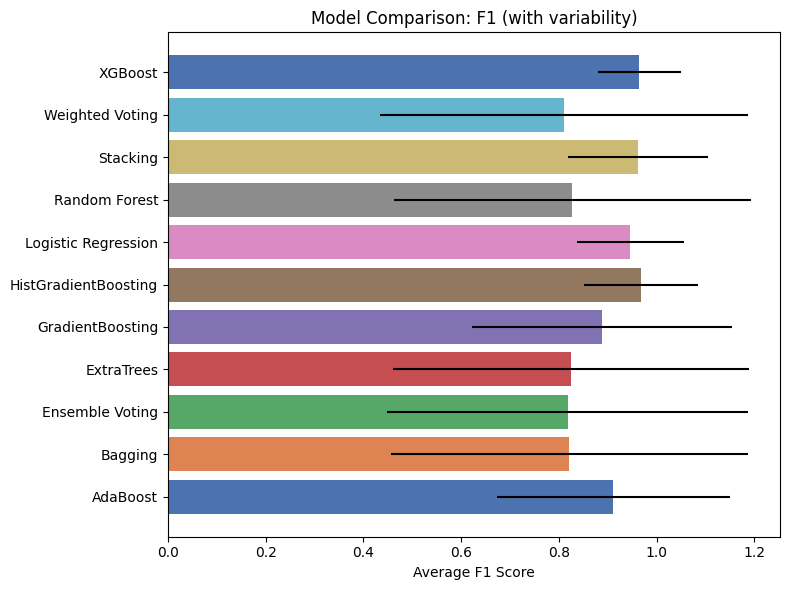

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

agg = results_df.groupby('Model').agg({'F1':['mean','std'], 'AP':'mean'}).reset_index()
agg.columns = ['Model','F1_mean','F1_std','PRAUC_mean']

# Plot using matplotlib directly to control xerr shape
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(
	agg['Model'],
	agg['F1_mean'],
	xerr=agg['F1_std'].values,
	color=sns.color_palette("deep", len(agg))
)
ax.set_xlabel('Average F1 Score')
ax.set_title('Model Comparison: F1 (with variability)')
plt.tight_layout()
plt.show()


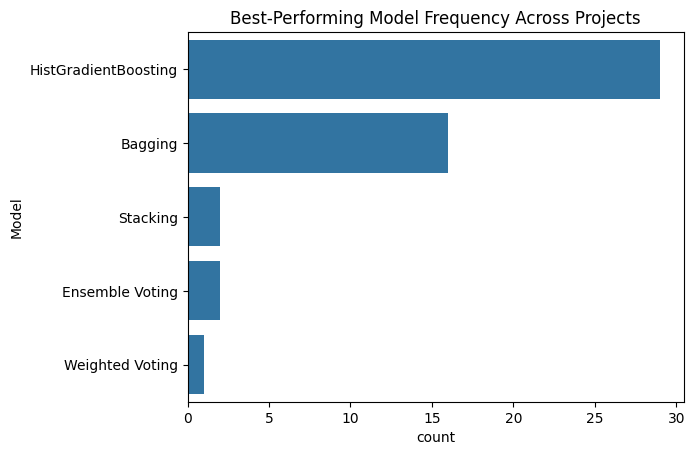

In [37]:
sns.countplot(data=best_models_df.reset_index(), y='Model', order=best_models_df['Model'].value_counts().index)
plt.title('Best-Performing Model Frequency Across Projects')
plt.show()


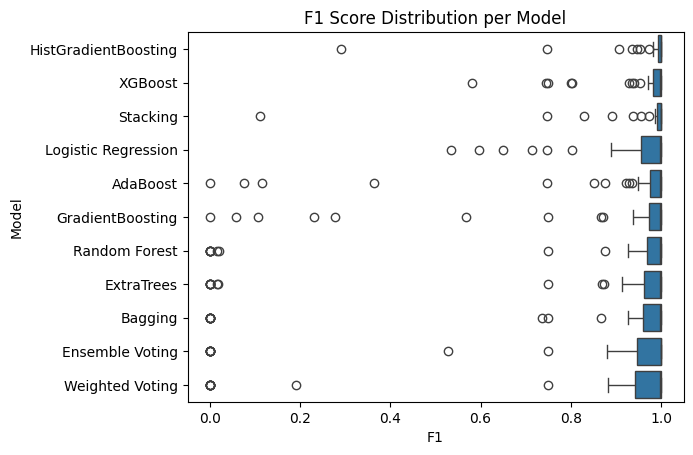

In [38]:
sns.boxplot(data=results_df, x='F1', y='Model', order=agg.sort_values('F1_mean', ascending=False)['Model'])
plt.title('F1 Score Distribution per Model')
plt.show()


In [39]:
best_models

{12: {'Model': 'HistGradientBoosting',
  'Metrics': {'Accuracy': 1.0,
   'Precision': 1.0,
   'Recall': 1.0,
   'F1': 1.0,
   'TN': 0,
   'FP': 0,
   'FN': 0,
   'TP': 0,
   'Specificity': 0,
   'AP': nan,
   'ROC-AUC': nan,
   'Brier': nan,
   'Log_Loss': nan,
   'Optimal_Threshold': 0.5,
   'Project_ID': 12,
   'Model': 'HistGradientBoosting',
   'Sample_Size': 650,
   'Class_0_Count': 304,
   'Class_1_Count': 346,
   'Params': {'classifier__min_samples_leaf': 20,
    'classifier__max_leaf_nodes': 31,
    'classifier__max_iter': 200,
    'classifier__max_bins': 128,
    'classifier__learning_rate': 0.05,
    'classifier__l2_regularization': 0.1}},
  'Model_Object': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='median')),
                                                

In [40]:
projectid = df_sorted["projectid"].unique().tolist()

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


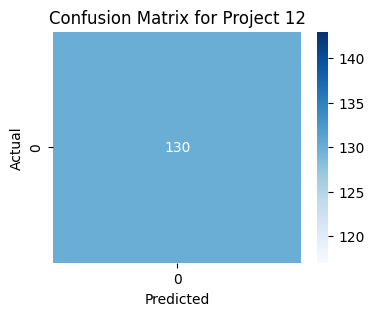

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


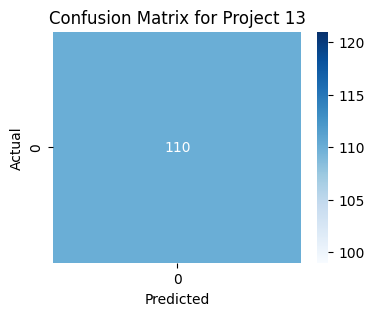

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


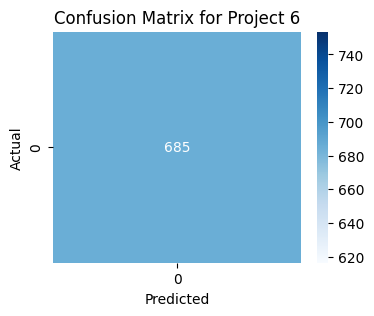

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


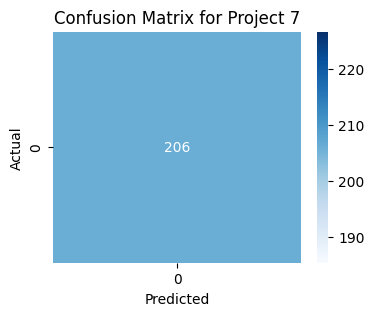

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


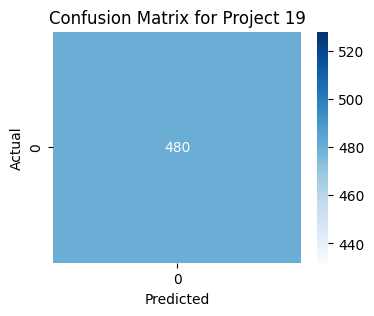

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


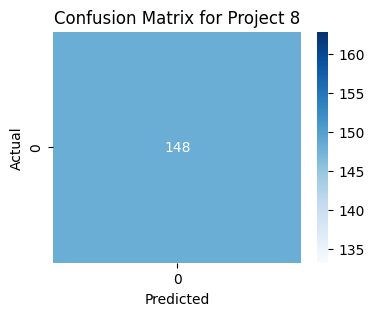

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


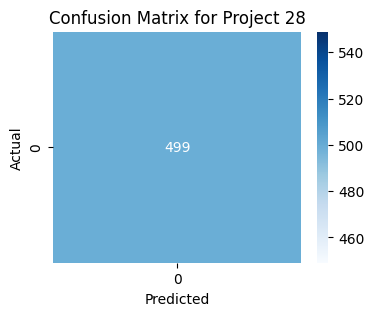

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


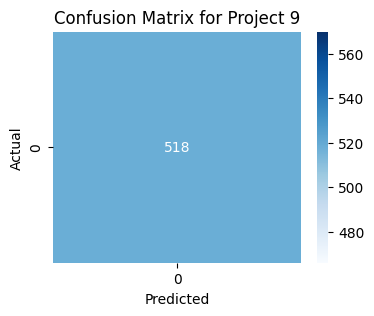

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


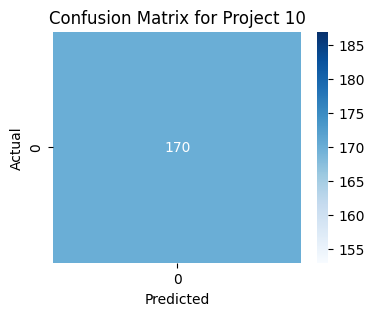

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


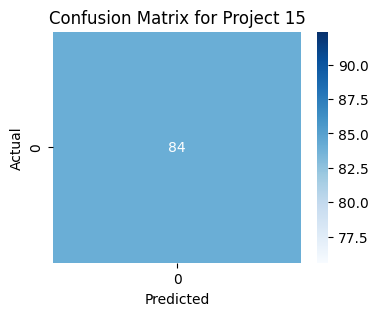

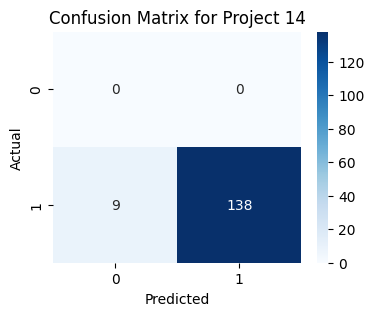

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


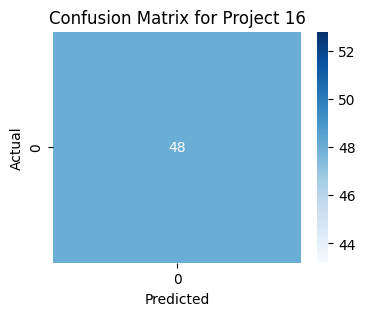

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


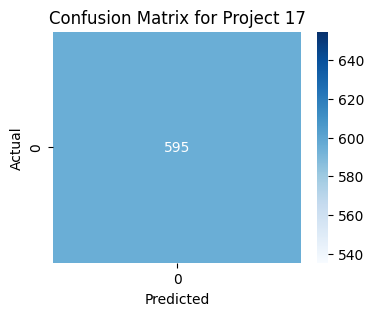

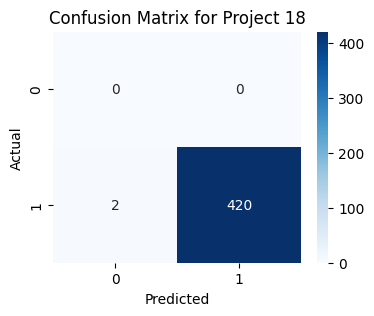

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


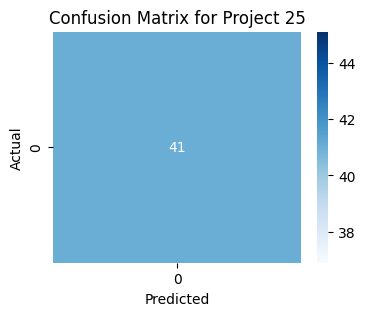

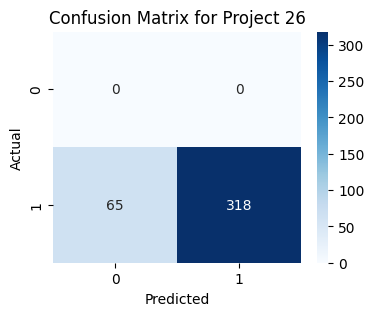

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


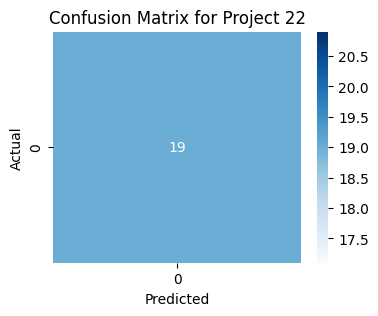

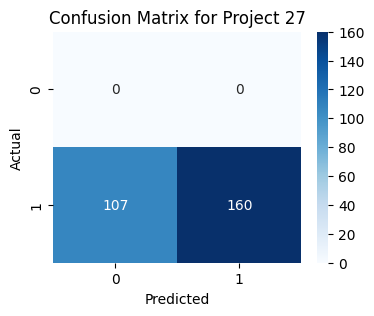

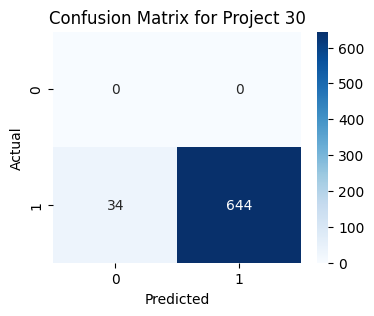

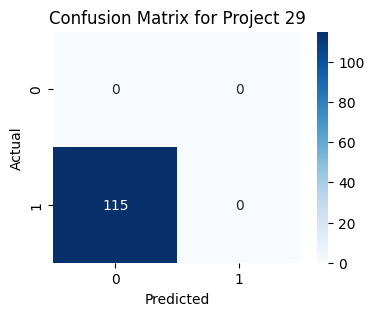

Skipping project 24: No trained model available.
Skipping project 21: No trained model available.


C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


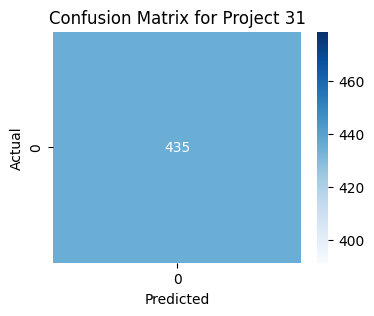

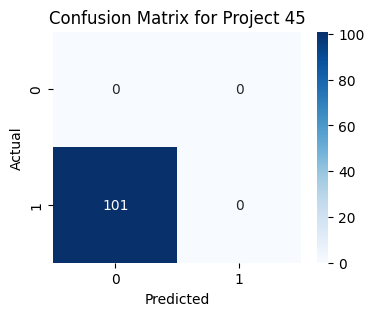

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


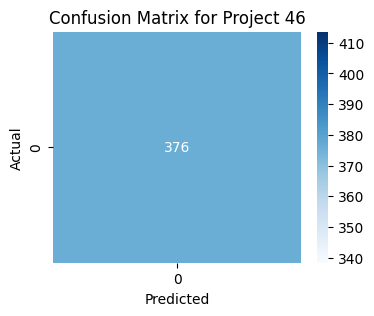

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


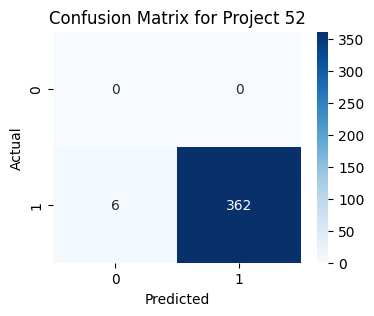

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


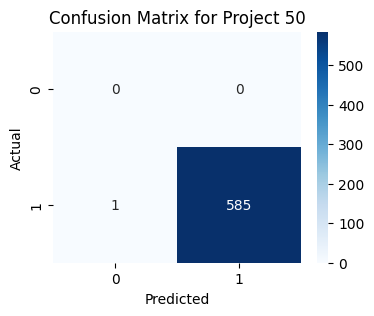

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


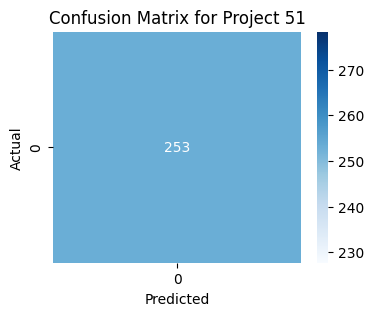

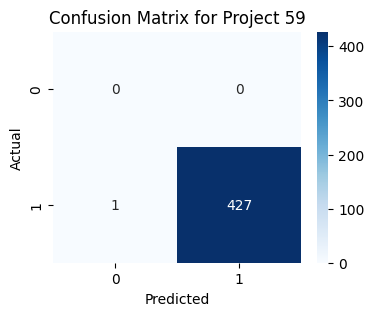

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


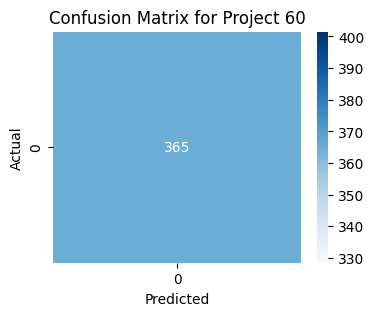

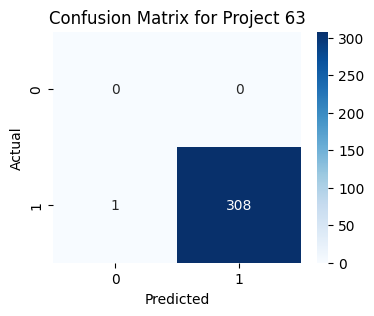

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


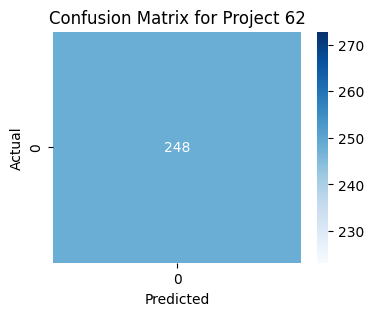

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


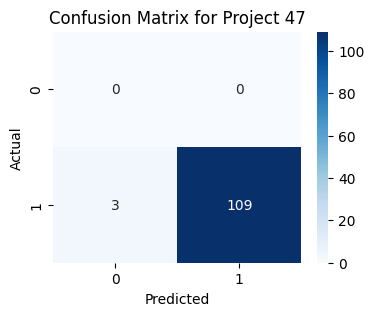

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


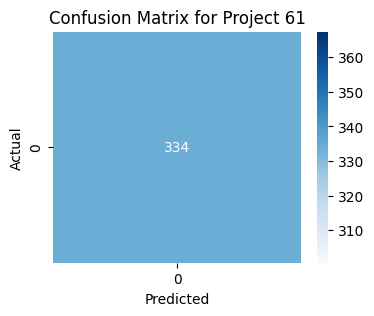

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


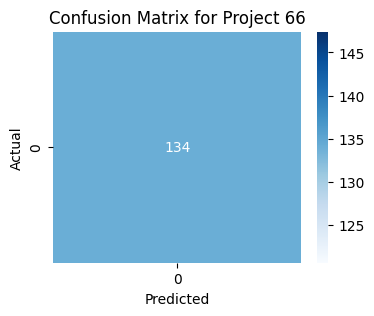

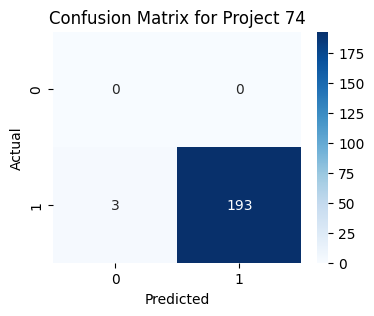

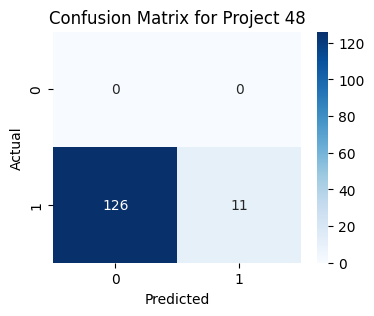

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


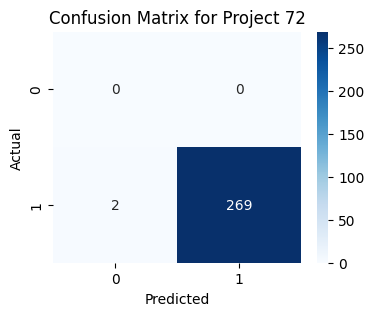

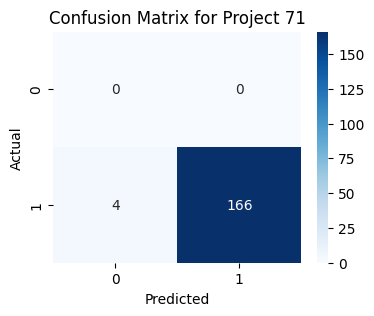

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


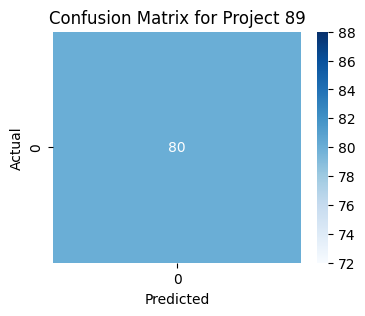

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


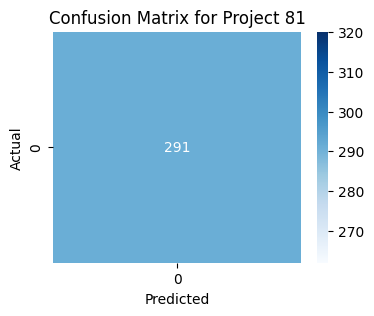

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


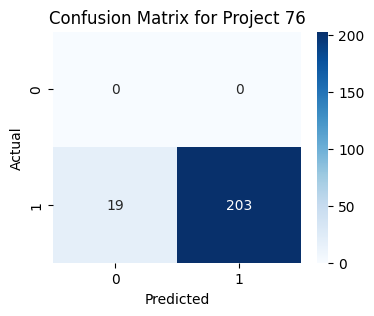

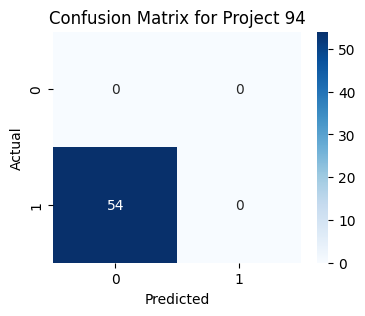

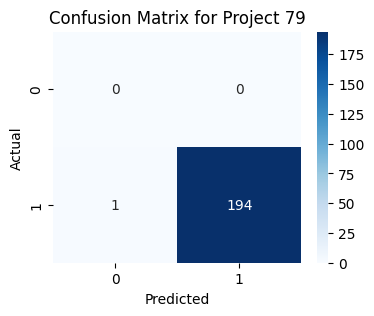

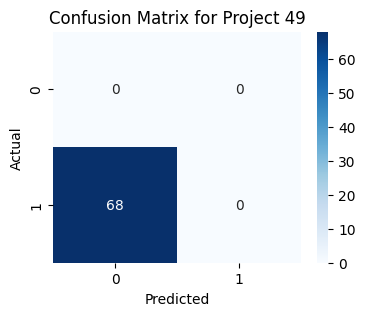

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


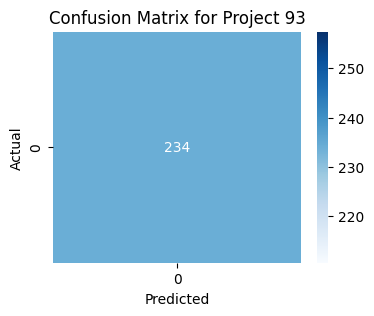

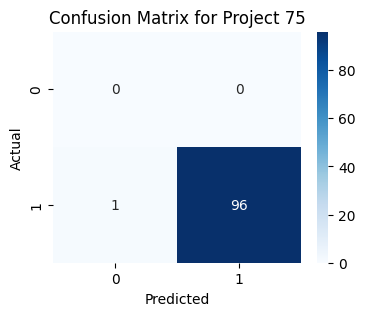

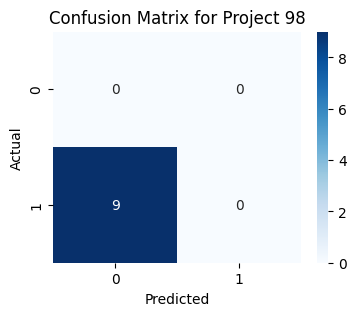

C:\Users\INTERN SBT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


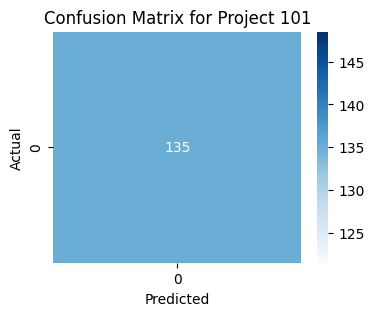

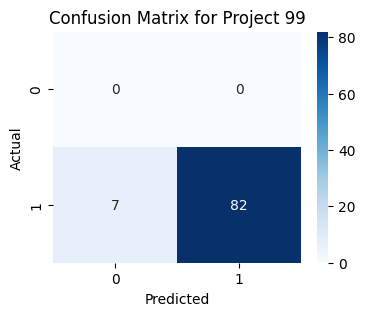

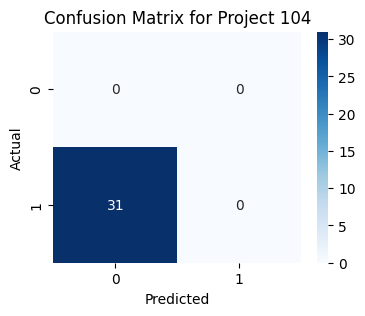

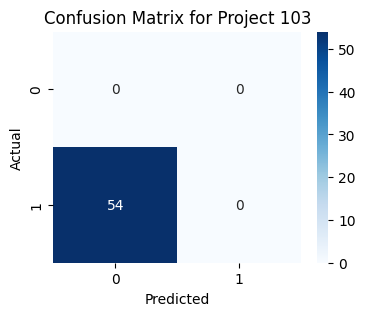

Skipping project 97: No trained model available.


In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for pid in projectid:
    if pid not in best_models:
        print(f"Skipping project {pid}: No trained model available.")
        continue

    # Get best model object for this project
    model_data = best_models[pid]
    model = model_data['Model_Object']
    optimal_threshold = model_data['Metrics'].get('Optimal_Threshold', 0.5)

    # Get project data
    project_df = df_sorted[df_sorted['projectid'] == pid].sort_index()
    X_train, X_val, y_train, y_val = time_split(project_df)

    # Drop constant columns (as done during training)
    constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
    X_val = X_val.drop(columns=constant_features)

    # Predict probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, "decision_function"):
        df = model.decision_function(X_val)
        y_probs = (df - df.min()) / (df.ptp() + 1e-8)
    else:
        y_probs = model.predict(X_val)

    # Apply threshold and compute confusion matrix
    y_pred = (y_probs >= optimal_threshold).astype(int)
    cm = confusion_matrix(y_val, y_pred)
    
    # Visualize
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Project {pid}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [52]:
# # =============================================
# # Imports
# # =============================================
# import pandas as pd
# import numpy as np
# from collections import Counter
# import warnings
# from sklearn.base import clone
# from tqdm import tqdm

# # Models
# from sklearn.ensemble import (
#     RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,
#     ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
# )
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import RidgeClassifier
# from sklearn.ensemble import HistGradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

# # Metrics
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score, f1_score,
#     confusion_matrix, roc_auc_score, average_precision_score,
#     roc_curve, brier_score_loss, log_loss
# )

# # Utils
# from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.exceptions import ConvergenceWarning

# warnings.filterwarnings("ignore", category=ConvergenceWarning)
# pd.options.mode.chained_assignment = None
# import lightgbm
# lightgbm.callback._log_warning = lambda *args, **kwargs: None


# # =============================================
# # Helper Functions
# # =============================================
# def time_split(project_df, target_col='has_booked', train_ratio=0.6, val_ratio=0.2):
#     project_df = project_df.sort_index()
#     n = len(project_df)
#     train_end = int(n * train_ratio)
#     val_end = train_end + int(n * val_ratio)

#     train = project_df.iloc[:train_end]
#     val = project_df.iloc[train_end:val_end]
#     test = project_df.iloc[val_end:]

#     X_train = train.drop(columns=[target_col, 'projectid'])
#     y_train = train[target_col]
#     X_val = val.drop(columns=[target_col, 'projectid'])
#     y_val = val[target_col]
#     X_test = test.drop(columns=[target_col, 'projectid'])
#     y_test = test[target_col]

#     return X_train, X_val, X_test, y_train, y_val, y_test


# def calculate_scale_pos_weight(y):
#     class_counts = Counter(y)
#     return class_counts[0] / class_counts[1] if class_counts[1] > 0 else 1.0


# def evaluate_model(y_true, y_pred, y_probs):
#     try:
#         cm = confusion_matrix(y_true, y_pred)
#         tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
#         metrics = {
#             'Accuracy': accuracy_score(y_true, y_pred),
#             'Precision': precision_score(y_true, y_pred, zero_division=0),
#             'Recall': recall_score(y_true, y_pred, zero_division=0),
#             'F1': f1_score(y_true, y_pred, zero_division=0),
#             'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
#             'Specificity': tn / (tn + fp) if (tn + fp) > 0 else 0
#         }
#         if len(np.unique(y_true)) > 1:
#             try:
#                 metrics.update({
#                     'AP': average_precision_score(y_true, y_probs),
#                     'ROC-AUC': roc_auc_score(y_true, y_probs),
#                     'Brier': brier_score_loss(y_true, y_probs),
#                     'Log_Loss': log_loss(y_true, y_probs)
#                 })
#                 fpr, tpr, thresholds = roc_curve(y_true, y_probs)
#                 optimal_idx = np.argmax(tpr - fpr)
#                 metrics['Optimal_Threshold'] = thresholds[optimal_idx]
#             except:
#                 metrics.update({'AP': np.nan, 'ROC-AUC': np.nan, 'Brier': np.nan, 'Log_Loss': np.nan, 'Optimal_Threshold': 0.5})
#         else:
#             metrics.update({'AP': np.nan, 'ROC-AUC': np.nan, 'Brier': np.nan, 'Log_Loss': np.nan, 'Optimal_Threshold': 0.5})
#         return metrics, None, None
#     except Exception as e:
#         print(f"Error in evaluate_model: {str(e)}")
#         return None, None, None


# # =============================================
# # Models + Hyperparameter Search Space
# # =============================================
# # === SEE YOUR ORIGINAL MESSAGE — no change needed ===
# models = {
#     # 1. Random Forest - Optimized for speed/performance balance
#     "Random Forest": {
#         "model": RandomForestClassifier(class_weight='balanced', random_state=42),
#         "params": {
#             "n_estimators": [100, 150, 300],
#             "max_depth": [5, 8, 12, None],
#             "min_samples_split": [5, 10, 20],
#             "max_features": ['sqrt', 0.7, 0.8],
#             "min_samples_leaf": [1, 3, 5],
#             "bootstrap": [True, False]
#         },
#         "search_strategy": {
#             "n_iter": 15,
#             "scoring": 'f1',
#             "early_stop": False
#         }
#     },
    
#     # 2. Logistic Regression - Optimized for linear problems
#     "Logistic Regression": {
#         "model": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
#         "params": {
#             "C": np.logspace(-3, 2, 10),
#             "solver": ['liblinear', 'saga'],
#             "penalty": ['l1', 'l2'],
#             "tol": [1e-4, 1e-3],
#             "fit_intercept": [True, False]
#         },
#         "search_strategy": {
#             "n_iter": 10,
#             "scoring": 'roc_auc',
#             "early_stop": True
#         }
#     },
    
#     # 3. XGBoost - Optimized for performance
#     "XGBoost": {
#         "model": XGBClassifier(
#             eval_metric='logloss',
#             use_label_encoder=False,
#             random_state=42
#         ),
#         "params": {
#             "n_estimators": [100, 200],
#             "learning_rate": [0.01, 0.05],
#             "max_depth": [3, 5],
#             "subsample": [0.7, 0.8, 1.0],
#             "colsample_bytree": [0.7, 0.8, 1.0],
#             "gamma": [0, 0.1, 0.2],
#             "reg_alpha": [0.1, 0.5, 1],
#             "reg_lambda": [0.1, 1, 2]
#         },
#         "search_strategy": {
#             "n_iter": 20,
#             "scoring": 'roc_auc',
#             "early_stop": True
#         }
#     },
    
#     # 4. LightGBM - Optimized version
#     "LightGBM": {
#         "model": LGBMClassifier(
#             objective='binary',
#             metric='auc',
#             random_state=42
#         ),
#         "params": {
#             "n_estimators": [50, 100, 150],
#             "learning_rate": [0.01, 0.05, 0.1],
#             "num_leaves": [15, 31, 63],
#             "feature_fraction": [0.7, 0.8, 0.9],
#             "min_data_in_leaf": [20, 50, 100],
#             "lambda_l1": [0, 0.1, 0.5],
#             "lambda_l2": [0, 0.1, 0.5]
#         },
#         "search_strategy": {
#             "n_iter": 15,
#             "scoring": 'f1',
#             "early_stop": True
#         }
#     },
    
#     # 5. HistGradientBoosting - Enhanced configuration
#     "HistGradientBoosting": {
#         "model": HistGradientBoostingClassifier(
#             random_state=42,
#             early_stopping=True
#         ),
#         "params": {
#             "max_iter": [100, 200, 300],
#             "learning_rate": [0.01, 0.05, 0.1],
#             "max_leaf_nodes": [15, 31, 63],
#             "min_samples_leaf": [10, 20, 50],
#             "l2_regularization": [0, 0.1, 1.0],
#             "max_bins": [128, 255]
#         },
#         "search_strategy": {
#             "n_iter": 15,
#             "scoring": 'roc_auc',
#             "early_stop": True
#         }
#     },
    
#     # 6. CatBoost - Optimized configuration
#     "CatBoost": {
#         "model": CatBoostClassifier(
#             verbose=0,
#             random_state=42,
#             auto_class_weights='Balanced'
#         ),
#         "params": {
#             "iterations": [100, 200, 300],
#             "learning_rate": [0.01, 0.05, 0.1],
#             "depth": [4, 6, 8],
#             "l2_leaf_reg": [1, 3, 5],
#             "border_count": [32, 64, 128]
#         },
#         "search_strategy": {
#             "n_iter": 10,
#             "scoring": 'f1',
#             "early_stop": True
#         }
#     },
#     # 7. Bagging Classifier
#     "Bagging": {
#         "model": BaggingClassifier(
#             estimator=DecisionTreeClassifier(class_weight='balanced'),
#             random_state=42
#         ),
#         "params": {
#             "n_estimators": [10, 50, 100],
#             "max_samples": [0.5, 0.8, 1.0],
#             "bootstrap": [True, False]
#         },
#         "search_strategy": {
#             "n_iter": 10,
#             "scoring": "f1",
#             "early_stop": False
#         }
#     },

#     # 8. Weighted Voting Ensemble
#     "Weighted Voting": {
#         "model": VotingClassifier(
#             estimators=[
#                 ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)),
#                 ('lgb', LGBMClassifier(objective='binary', metric='auc', random_state=42)),
#                 ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
#             ],
#             voting='soft',
#             weights=[2, 1, 1],  # Customize weights if needed
#             n_jobs=-1
#         ),
#         "params": {
#             "weights": [(1, 1, 1), (2, 1, 1), (1, 2, 2)]
#         },
#         "search_strategy": {
#             "n_iter": 3,
#             "scoring": "f1",
#             "early_stop": False
#         }
#     },

#     # 9. Gradient Boosting
#     "GradientBoosting": {
#         "model": GradientBoostingClassifier(random_state=42),
#         "params": {
#             "n_estimators": [100, 200],
#             "learning_rate": [0.01, 0.1],
#             "max_depth": [3, 5],
#             "subsample": [0.8, 1.0]
#         },
#         "search_strategy": {
#             "n_iter": 10,
#             "scoring": "f1",
#             "early_stop": False
#         }
#     },

#     # 10. Extra Trees
#     "ExtraTrees": {
#         "model": ExtraTreesClassifier(class_weight='balanced', random_state=42),
#         "params": {
#             "n_estimators": [100, 200],
#             "max_depth": [None, 10, 20],
#             "min_samples_split": [2, 5]
#         },
#         "search_strategy": {
#             "n_iter": 8,
#             "scoring": "f1",
#             "early_stop": False
#         }
#     },

#     # 11. AdaBoost
#     "AdaBoost": {
#         "model": AdaBoostClassifier(random_state=42),
#         "params": {
#             "n_estimators": [50, 100],
#             "learning_rate": [0.01, 0.1, 1.0]
#         },
#         "search_strategy": {
#             "n_iter": 6,
#             "scoring": "f1",
#             "early_stop": False
#         }
#     },

#     # 12. Ensemble Voting Classifier
#     "Ensemble Voting": {
#         "model": VotingClassifier(
#             estimators=[
#                 ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
#                 ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)),
#                 ('lgbm', LGBMClassifier(objective='binary', metric='auc', random_state=42)),
#             ],
#             voting='soft',  # soft = use predicted probabilities
#             n_jobs=-1
#         ),
#         "params": {
#             "voting": ['soft', 'hard']
#             # You can optionally tune sub-estimators' params too but it's complex
#         },
#         "search_strategy": {
#             "n_iter": 1,  # No real tuning needed unless you parameterize the base models
#             "scoring": 'f1',
#             "early_stop": False
#         }
#     },
#     # 13. Stacking Classifier
#     "Stacking": {
#         "model": StackingClassifier(
#             estimators=[
#                 ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
#                 ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
#                 ('lgb', LGBMClassifier(random_state=42))
#             ],
#             final_estimator=LogisticRegression(),
#             cv=3,
#             n_jobs=-1
#         ),
#         "params": {},  # Can add if needed
#         "search_strategy": {
#             "n_iter": 1,
#             "scoring": 'f1',
#             "early_stop": False
#         }
#     }

# }


# # =============================================
# # Main Training Loop
# # =============================================
# best_models = {}
# model_performance = []
# failed_projects = {}
# all_important_features = []

# MIN_SAMPLES = 50
# MIN_POS_SAMPLES = 5

# for project_id in tqdm(df_sorted['projectid'].unique(), desc="Processing Projects"):
#     project_data = df_sorted[df_sorted['projectid'] == project_id].sort_index()
#     sample_size = len(project_data)
#     class_counts = project_data['has_booked'].value_counts()

#     if sample_size < MIN_SAMPLES or class_counts.get(1, 0) < MIN_POS_SAMPLES:
#         failed_projects[project_id] = "Skipped: Insufficient data"
#         continue

#     try:
#         X_train, X_val, X_test, y_train, y_val, y_test = time_split(project_data)
#         constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
#         if constant_features:
#             X_train.drop(columns=constant_features, inplace=True)
#             X_val.drop(columns=constant_features, inplace=True)

#         pos_weight = calculate_scale_pos_weight(y_train)

#         for model_name, model_info in models.items():
#             if sample_size < 100 and model_name in ["HistGradientBoosting", "XGBoost"]:
#                 continue

#             try:
#                 model = clone(model_info["model"])

#                 if hasattr(model, 'set_params'):
#                     if 'scale_pos_weight' in model.get_params():
#                         model.set_params(scale_pos_weight=pos_weight)
#                     elif 'class_weight' in model.get_params():
#                         model.set_params(class_weight='balanced')

#                 stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#                 search = RandomizedSearchCV(
#                     estimator=model,
#                     param_distributions=model_info["params"],
#                     n_iter=model_info["search_strategy"]["n_iter"],
#                     cv=stratified_cv,
#                     scoring=model_info["search_strategy"]["scoring"],
#                     n_jobs=-1,
#                     verbose=0,
#                     random_state=42
#                 )

#                 if model_info["search_strategy"]["early_stop"]:
#                     if hasattr(model, 'fit') and ('eval_set' in model.fit.__code__.co_varnames):
#                         search.fit(X_train, y_train, estimator__eval_set=[(X_val, y_val)], estimator__early_stopping_rounds=10)
#                     else:
#                         search.fit(X_train, y_train)
#                 else:
#                     search.fit(X_train, y_train)

#                 best_model = search.best_estimator_

#                 if hasattr(best_model, "predict_proba"):
#                     y_probs = best_model.predict_proba(X_val)[:, 1]
#                 else:
#                     y_probs = best_model.decision_function(X_val)
#                     y_probs = (y_probs - y_probs.min()) / (y_probs.max() - y_probs.min() + 1e-8)

#                 y_pred = (y_probs > 0.5).astype(int)
#                 metrics, _, _ = evaluate_model(y_val, y_pred, y_probs)

#                 if metrics:
#                     metrics.update({
#                         'Project_ID': project_id,
#                         'Model': model_name,
#                         'Sample_Size': sample_size,
#                         'Class_0_Count': class_counts.get(0, 0),
#                         'Class_1_Count': class_counts.get(1, 0),
#                         'Params': search.best_params_
#                     })
#                     model_performance.append(metrics)

#                     # Feature importances
#                     if hasattr(best_model, 'feature_importances_'):
#                         importances = best_model.feature_importances_
#                     elif hasattr(best_model, 'coef_'):
#                         importances = np.abs(best_model.coef_).flatten()
#                     else:
#                         importances = None

#                     if importances is not None:
#                         top_features = pd.Series(importances, index=X_train.columns).nlargest(5).index.tolist()
#                         all_important_features.extend(top_features)

#                     if project_id not in best_models or metrics['F1'] > best_models[project_id]['Metrics']['F1']:
#                         best_models[project_id] = {
#                             'Model': model_name,
#                             'Metrics': metrics,
#                             'Model_Object': best_model
#                         }

#             except Exception as e:
#                 failed_projects.setdefault(project_id, []).append(f"{model_name} failed: {str(e)}")
#                 continue

#     except Exception as e:
#         failed_projects[project_id] = f"Processing failed: {str(e)}"
#         continue

# # =============================================
# # Results Summary
# # =============================================
# if model_performance:
#     results_df = pd.DataFrame(model_performance)
    
#     print("\n=== Average Model Performance ===")
#     print(results_df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC', 'AP']]
#           .mean().sort_values('F1', ascending=False))
    
#     print("\n=== Best Models by Project ===")
#     best_models_df = pd.DataFrame.from_dict({
#         pid: data['Metrics'] for pid, data in best_models.items()
#     }, orient='index')
#     print(best_models_df.sort_values('F1', ascending=False).head(10))
    
#     if all_important_features:
#         print("\n=== Top Global Features ===")
#         feature_counts = pd.Series(Counter(all_important_features))
#         print(feature_counts.sort_values(ascending=False).head(20))
# else:
#     print("No models were successfully trained.")


# Export model

In [ ]:
import joblib
import os

export_dir = "backend/saved_models"
os.makedirs(export_dir, exist_ok=True)

# Export each best model
for project_id, model_data in best_models.items():
    try:
        # This is the actual trained pipeline/model
        model_obj = model_data.get("Model_Object")  # ✅ USE THIS
        if model_obj is None:
            print(f"⚠️ Skipping project {project_id}: No trained model object.")
            continue

        # Extract preprocessor if needed
        preprocessor = None
        if hasattr(model_obj, 'named_steps') and 'preprocessor' in model_obj.named_steps:
            preprocessor = model_obj.named_steps['preprocessor']

        save_dict = {
            "project_id": project_id,
            "model": model_obj,                   # ✅ Save actual model
            "preprocessor": preprocessor,         # Optional
            "features": list(model_obj.feature_names_in_) if hasattr(model_obj, 'feature_names_in_') else [],
            "metrics": model_data.get("Metrics", {})
        }

        joblib.dump(save_dict, f"{export_dir}/project_{project_id}_model.pkl")

    except Exception as e:
        print(f"❌ Error saving project {project_id}: {e}")


In [67]:
import joblib

project_id = 6
model_path = f"{export_dir}/project_{project_id}_model.pkl"

try:
    loaded_model_data = joblib.load(model_path)
    model = loaded_model_data.get("model")
    preprocessor = loaded_model_data.get("preprocessor", None)
    features = loaded_model_data.get("features", [])

    if model is None:
        raise ValueError(f"No model found in the saved file for project {project_id}.")

    print(f"Model and related components for project {project_id} loaded successfully.")

except FileNotFoundError:
    print(f"Model file not found for project {project_id}.")
except Exception as e:
    print(f"Error loading model for project {project_id}: {str(e)}")


Model and related components for project 6 loaded successfully.


In [68]:
model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Explanation of model

In [69]:
df_sorted.columns.to_list()

['projectid',
 'gender',
 'purchasing_reason',
 'decide_purchase_reason',
 'not_book_reason',
 'other_projects_before_deicde',
 'condo_payment',
 'day_off_activity',
 'most_interested_activites_participation',
 'room_size_wanted',
 'purchase_budget',
 'residences_count',
 'would_recommend',
 'information_source',
 'saw_sign',
 'car_type',
 'decision_time_frame',
 'family_monthly_income',
 'individual_monthly_income_baht',
 'exercise_preference',
 'condo_living_style',
 'car_brand',
 'purchase_intent',
 'travel_route_today',
 'marital_status',
 'occupation',
 'age',
 'Project Brand',
 'Project Type',
 'Starting Price',
 'Location',
 'has_booked',
 'hour_sin',
 'hour_cos',
 'day',
 'month',
 'quarter',
 'year',
 'week',
 'day_of_week',
 'is_weekend',
 'day_of_year',
 'season']

In [70]:
# Ensure 'df_sorted' exists and has enough data
if 'df_sorted' in locals() and len(df_sorted) >= 20:
    X_sample = df_sorted[df_sorted['projectid'] == int(project_id)].drop(columns=['has_booked'], errors='ignore').tail(20)

    # Make predictions
    try:
        predictions = model.predict(X_sample)
        print("Predictions on last 20 samples:", predictions)
    except Exception as e:
        print("Error during prediction:", e)
else:
    print("Not enough data or missing dataframe 'df_sorted'.")


Predictions on last 20 samples: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1]


In [71]:
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['hour_sin', 'hour_cos', 'day', 'month', 'quarter', 'year',
       'day_of_week', 'day_of_year', 'season'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')...
       'individual_monthly_income_baht', 'exercise_preference',
       'condo_living_style', 'car_brand', 'purchase_intent',
       

## Permutation Importance

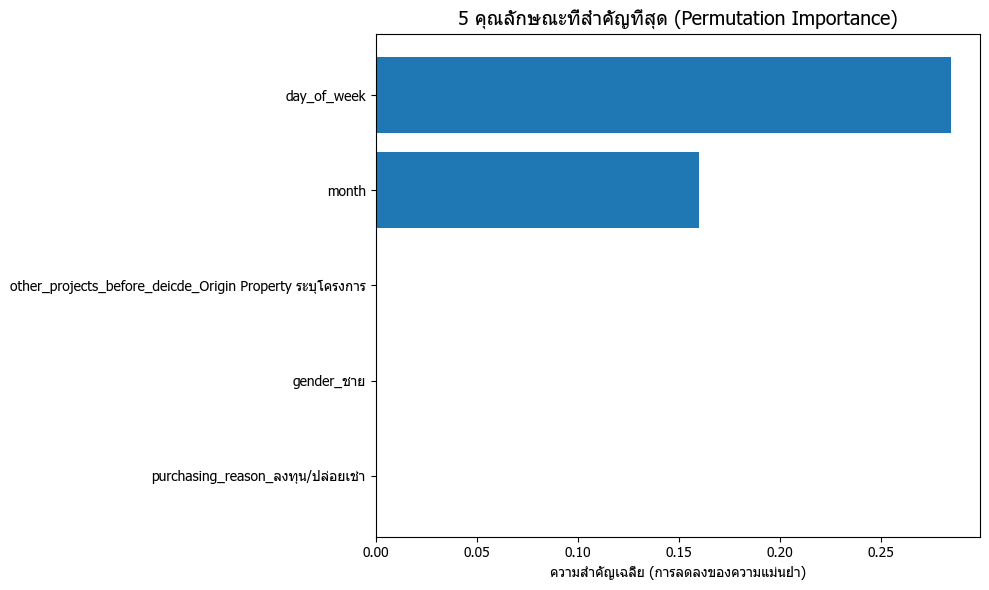

In [72]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Set a Thai-compatible font available on Windows (e.g., "Tahoma")
mpl.rcParams['font.family'] = 'Tahoma'

# Run permutation importance
result = permutation_importance(model, X_sample, predictions, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature names
cat_features = model.named_steps['preprocessor'].transformers_[1][2]
encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
cat_feature_names = encoder.get_feature_names_out(cat_features)
num_feature_names = model.named_steps['preprocessor'].transformers_[0][2]
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Plot
sorted_idx = result.importances_mean.argsort()[::-1][:5]
plt.figure(figsize=(10, 6))
plt.barh(range(5), result.importances_mean[sorted_idx][::-1])
plt.yticks(range(5), np.array(all_feature_names)[sorted_idx][::-1])
plt.xlabel("ความสำคัญเฉลี่ย (การลดลงของความแม่นยำ)")  # Thai label
plt.title("5 คุณลักษณะที่สำคัญที่สุด (Permutation Importance)", fontsize=14)  # Thai title
plt.tight_layout()
plt.show()


## SHAP

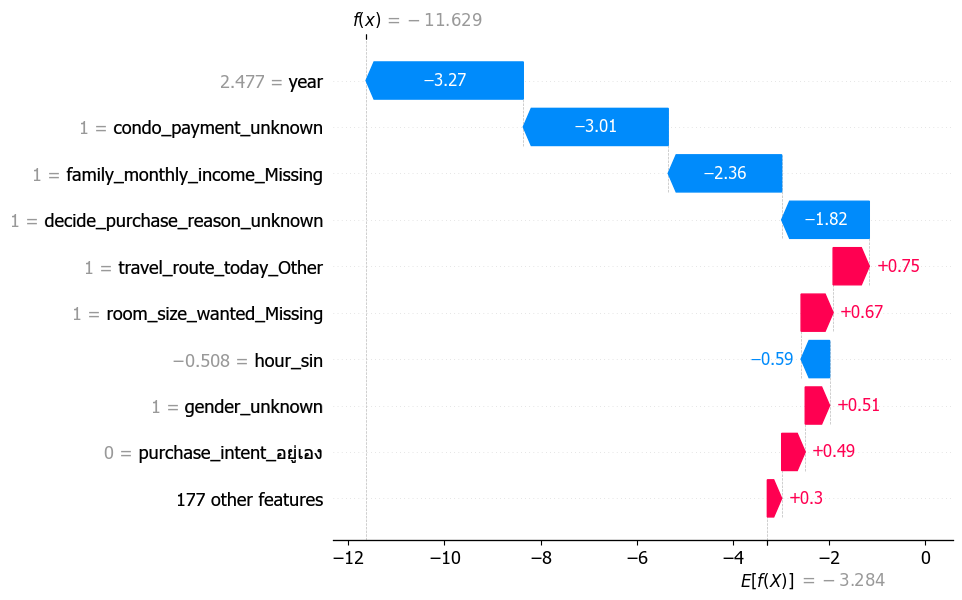

In [73]:
import shap

# Get the preprocessor and transform the data
preprocessor = model.named_steps['preprocessor']
X_transformed = preprocessor.transform(X_sample)

# Get feature names after preprocessing
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if name == 'num':
        # For numeric features, just use the original names
        feature_names.extend(features)
    elif name == 'cat':
        # For categorical features, get the one-hot encoded names
        encoder = transformer.named_steps['encoder']
        feature_names.extend(encoder.get_feature_names_out(features))
        
# Create explainer with feature names
explainer = shap.Explainer(model.named_steps['classifier'])
shap_values = explainer(X_transformed)

# Set the feature names
shap_values.feature_names = feature_names

# Now visualize with proper names
shap.plots.waterfall(shap_values[0])

## Interpret ML

In [74]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.blackbox import LimeTabular
from interpret.perf import ROC
from sklearn.model_selection import train_test_split

# Prepare data for interpretML (drop target and non-feature columns)
# Get the preprocessor and transform the data
preprocessor = model.named_steps['preprocessor']
X_transformed = preprocessor.transform(X_sample)
X = project_df.drop(columns=['has_booked', 'projectid'], errors='ignore')
y = project_df['has_booked']

# Split for demonstration (interpretML needs some test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Explainable Boosting Machine (EBM)
ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_train, y_train)

# Global explanation
ebm_global = ebm.explain_global()
show(ebm_global)

# Local explanation for the first test sample
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

# Optionally, show ROC curve
roc = ROC(ebm.predict_proba).explain_perf(X_test, y_test)
show(roc)

<!-- http://127.0.0.1:7001/1987591094592/ -->

<!-- http://127.0.0.1:7001/1987586594224/ -->

<!-- http://127.0.0.1:7001/1987572951488/ -->

## Simple Explanation

In [ ]:
import random
from IPython.display import display
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
pd.set_option('display.width', 20)
# === Random Project Analysis and Reasoning ===

# Step 1: Select a random project ID with a trained best model
random_project_id = random.choice(list(best_models.keys()))
print(f"\n=== Analyzing Project: {random_project_id} ===")

# Step 2: Retrieve project data
project_df = df_sorted[df_sorted['projectid'] == random_project_id].sort_index()
X_train, X_val, X_test, y_train, y_val, y_test = time_split(project_df)

# Drop constant columns
constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
X_test = X_test.drop(columns=constant_features)

# Step 3: Get best model for this project
model_data = best_models[random_project_id]
model = model_data['Model_Object']
optimal_threshold = model_data['Metrics'].get('Optimal_Threshold', 0.5)

# Step 4: Make predictions
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= optimal_threshold).astype(int)

# Step 5: Build result DataFrame
prediction_df = X_test.copy()
prediction_df['True_Label'] = y_test.values
prediction_df['Pred_Probability'] = y_probs
prediction_df['Prediction'] = y_pred

# Step 6: Add Reasoning (simple rule-based using top features if available)
top_features = top_features_global.head(5).index.tolist()

def generate_reasoning(row, features):
    reasons = []
    for feat in features:
        if feat in row:
            val = row[feat]
            if val > project_df[feat].median():
                reasons.append(f"{feat} is high")
            else:
                reasons.append(f"{feat} is low")
    return "; ".join(reasons[:5]) if reasons else "No dominant feature trend"

prediction_df['Reasoning'] = prediction_df.apply(lambda row: generate_reasoning(row, top_features), axis=1)

# Show sample
print("\n=== Sample Predictions and Reasoning ===")
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
# display(prediction_df.style.set_properties(subset=['Reasoning'], **{'white-space': 'pre-wrap'}))
display(prediction_df[['True_Label', 
                       'Prediction', 
                       'Pred_Probability', 
                       'Reasoning']].style.set_properties(subset=['Reasoning'], **{'white-space': 'pre-wrap'}))



=== Analyzing Project: 49 ===

=== Sample Predictions and Reasoning ===
Overall Accuracy: 0.0547945205479452


,True_Label,Prediction,Pred_Probability,Reasoning
38819,0,0,0.000000,decision_time_frame is high; room_size_wanted is high; purchase_budget is low
39278,0,0,0.000000,decision_time_frame is high; room_size_wanted is low; purchase_budget is low
39279,0,0,0.000000,decision_time_frame is low; room_size_wanted is high; purchase_budget is high
39280,0,0,0.000000,decision_time_frame is low; room_size_wanted is high; purchase_budget is low
42876,1,0,0.000000,decision_time_frame is low; room_size_wanted is low; purchase_budget is low
42877,1,0,0.000000,decision_time_frame is low; room_size_wanted is high; purchase_budget is high
43288,1,0,0.000000,decision_time_frame is low; room_size_wanted is low; purchase_budget is low
44388,1,0,0.000000,decision_time_frame is low; room_size_wanted is low; purchase_budget is low
44389,1,0,0.000000,decision_time_frame is low; room_size_wanted is low; purchase_budget is low
45039,1,0,0.000000,decision_time_frame is low; room_size_wanted is high; purchase_budget is high
